In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
data=pd.read_csv('Downloads/dataset2.csv')

In [6]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91,11.01,10.0,3,2.70,1,NaN
1,OH,107,415,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,NaN
2,NJ,137,415,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,NaN
3,OH,84,408,Yes,No,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89,8.86,6.6,7,1.78,2,NaN
4,OK,75,415,Yes,No,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,NaN


In [10]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3331.000000,3330.000000,3329.000000,3332.000000,3331.000000,3330.000000,3331.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,483.0
mean,101.064806,437.182418,8.103873,179.732042,100.406729,30.559724,200.967217,100.111712,17.082321,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,1.0
std,39.822106,42.371290,13.691036,54.466463,20.030830,9.259623,50.725199,19.921990,4.309873,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.0
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,1.0
25%,74.000000,408.000000,0.000000,143.625000,87.000000,24.425000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,1.0
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.300000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.0
75%,127.000000,510.000000,20.000000,216.275000,114.000000,36.775000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,1.0
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.0


In [12]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [14]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages     float64
Total day minutes         float64
Total day calls           float64
Total day charge          float64
Total eve minutes         float64
Total eve calls           float64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                     float64
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3325 non-null   object 
 4   Voice mail plan         3331 non-null   object 
 5   Number vmail messages   3331 non-null   float64
 6   Total day minutes       3330 non-null   float64
 7   Total day calls         3329 non-null   float64
 8   Total day charge        3332 non-null   float64
 9   Total eve minutes       3331 non-null   float64
 10  Total eve calls         3330 non-null   float64
 11  Total eve charge        3331 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [42]:
data.isnull().sum()

State                        0
Account length               0
Area code                    0
International plan           8
Voice mail plan              2
Number vmail messages        2
Total day minutes            3
Total day calls              4
Total day charge             1
Total eve minutes            2
Total eve calls              3
Total eve charge             2
Total night minutes          0
Total night calls            0
Total night charge           0
Total intl minutes           0
Total intl calls             0
Total intl charge            0
Customer service calls       0
Churn                     2850
Total_call_duration          5
dtype: int64

In [44]:
data['International plan'].fillna(data['International plan'].mode()[0], inplace=True)
data['Voice mail plan'].fillna(data['Voice mail plan'].mode()[0], inplace=True)

numerical_cols = ['Number vmail messages', 'Total day minutes', 'Total day calls', 
                  'Total day charge', 'Total eve minutes', 'Total eve calls', 
                  'Total eve charge']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

data['International plan'] = data['International plan'].astype('category')
data['Voice mail plan'] = data['Voice mail plan'].astype('category')

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   3333 non-null   object  
 1   Account length          3333 non-null   int64   
 2   Area code               3333 non-null   int64   
 3   International plan      3333 non-null   category
 4   Voice mail plan         3333 non-null   category
 5   Number vmail messages   3333 non-null   float64 
 6   Total day minutes       3333 non-null   float64 
 7   Total day calls         3333 non-null   float64 
 8   Total day charge        3333 non-null   float64 
 9   Total eve minutes       3333 non-null   float64 
 10  Total eve calls         3333 non-null   float64 
 11  Total eve charge        3333 non-null   float64 
 12  Total night minutes     3333 non-null   float64 
 13  Total night calls       3333 non-null   int64   
 14  Total night charge      

C:\Users\LAB-USER-01\AppData\Local\Temp\ipykernel_6404\3154583955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['International plan'].fillna(data['International plan'].mode()[0], inplace=True)
C:\Users\LAB-USER-01\AppData\Local\Temp\ipykernel_6404\3154583955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_call_duration
0,KS,128,415,No,Yes,25.0,265.1,110.0,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,NaN,717.2
1,OH,107,415,No,Yes,26.0,161.6,123.0,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,NaN,625.2
2,NJ,137,415,No,No,0.0,243.4,114.0,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,NaN,539.4
3,OH,84,408,Yes,No,0.0,299.4,71.0,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,NaN,564.8
4,OK,75,415,Yes,No,0.0,166.7,113.0,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,NaN,512.0


ValueError: num must be an integer with 1 <= num <= 16, not 17

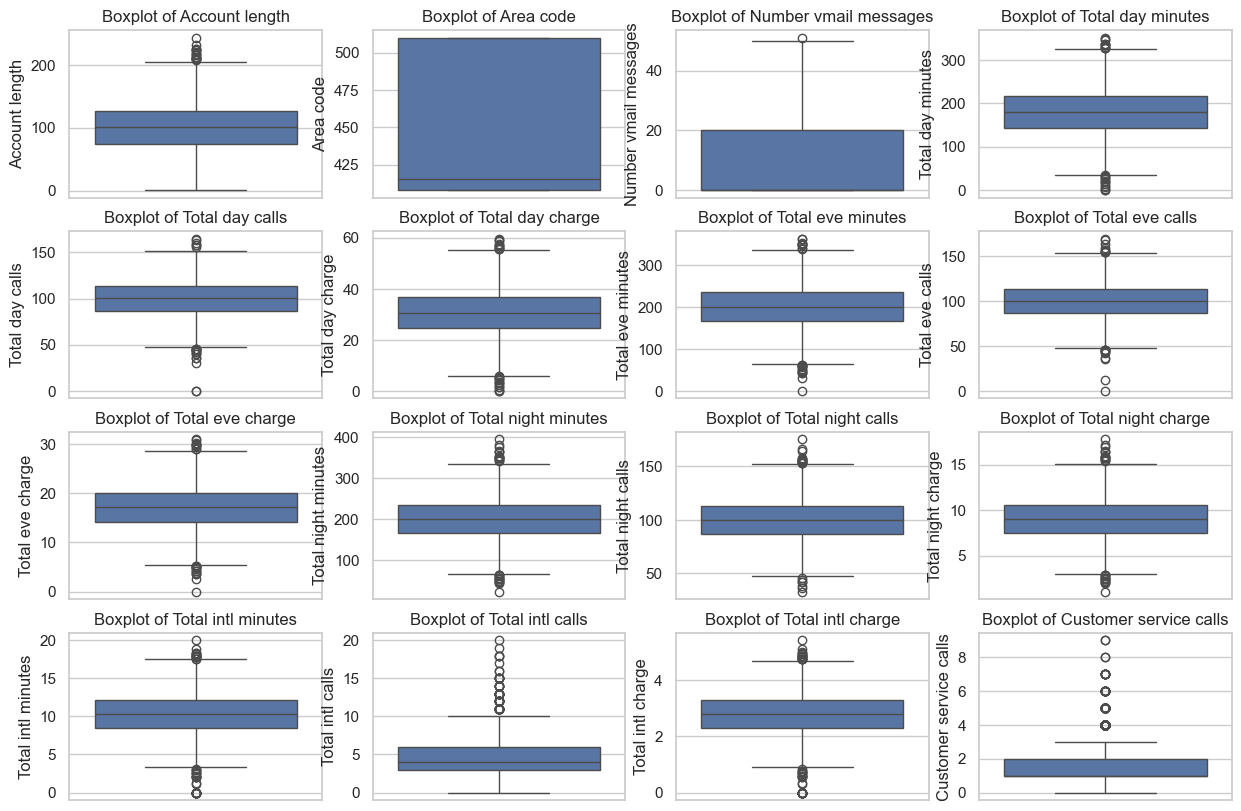

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# boxplot for each numerical column in the dataset
plt.figure(figsize=(15, 10))
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Feature Engineering

data['Total_call_duration'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']
data['Customer_service_ratio'] = data['Customer service calls'] / (data['Total calls'] + 1)  

X = data.drop(['Churn'], axis=1)  
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] 

    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
    
    # classification report and confusion matrix for each model
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:\n", results[model_name]["Confusion Matrix"])
    
# Display result
for model_name, metrics in results.items():
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.4f}")
